# HI!!!
**Author**: Rizal Aditya <br>

[![LinkedIn](https://img.shields.io/badge/linkedin-0077B5?style=for-the-badge&logo=linkedin&logoColor=white&link=https://www.linkedin.com/in/adhangmuntaha/)](https://www.linkedin.com/in/rzladitya/)
-----
## Lets get started !!! 

# When dealing with machine learning problems, there are generally two types of data (and machine learning models):
- Supervised data: always has one or multiple targets associated with it.
- Unsupervised data: does not have any target variable.

A supervised problem is considerably easier to tackle than an unsupervised one. A problem in which we are required to predict a value is known as a supervised problem. For example, if the problem is to predict house prices given historical house prices, with features like presence of a hospital, school or supermarket, distance to nearest public transport, etc. is a upervised problem. Similarly, when we are provided with images of cats and dogs, and we know beforehand which ones are cats and which ones are dogs, and if the task is to create a model which predicts whether a provided image is of a cat or a dog, the problem is considered to be 
supervised.

Here in this Dataset we have a Supervised Machine Learning Problem, For Heart Failure Prediction

# Context 

<img src="https://media.giphy.com/media/8cBhJBU2wlq6H6qY4W/giphy.gif">

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.



# Data

The data set is from the "Kaggle" freely available, for details see:  
https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

* Number of Samples: 299 
* Number of Features: 12 numeric, predictive attributes  
* Number of Classes: 2 

1. Boolean features
     * Sex - Gender of patient Male = 1, Female =0
     * Diabetes - 0 = No, 1 = Yes
     * Anaemia - 0 = No, 1 = Yes
     * High_blood_pressure - 0 = No, 1 = Yes
     * Smoking - 0 = No, 1 = Yes
     * DEATH_EVENT - 0 = No, 1 = Yes
     
2. Other informations
     * mcg/L: micrograms per liter. 
     * mL: microliter. 
     * mEq/L: milliequivalents per litre
     * The time feature seams to be highly correlated to the death event but there is no concret information of how this metric was measured patient by patient. Which makes it hard to use it in the analysis.

The two target classes correspond to negative outcomes (0) and positive outcomes (1).

**This original data set will be randomly split into two sets for train and test purposes.**

# Import Library 

In [1]:
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)

from collections import OrderedDict
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

DISPLAY_PRECISION = 4
pd.set_option("display.precision", DISPLAY_PRECISION)

In [2]:
# Read and import data from local
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head() # Show first 5 rows in dataframes

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Describe the fitures statistics

In [3]:
# Note that we need to reverse the original '0' and '1' mapping in order to end up with this mapping:
# Benign = 0 (negative class)
# Malignant = 1 (positive class)

li_classes = df['DEATH_EVENT'].unique()
li_target = [1 if x==0 else 0 for x in list(df.DEATH_EVENT)]
#li_ftrs = list(dat.feature_names)

print("There are 2 target classes:")
print("list_classes", li_classes)
print("")
print("Target class distribution from a total of %d target values:" % len(li_target))
print(pd.Series(li_target).value_counts())
print("")
print("Describe dataframe")
print(df.iloc[:,:].describe().to_string())

There are 2 target classes:
list_classes [1 0]

Target class distribution from a total of 299 target values:
1    203
0     96
dtype: int64

Describe dataframe
            age   anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  high_blood_pressure    platelets  serum_creatinine  serum_sodium       sex   smoking      time  DEATH_EVENT
count  299.0000  299.0000                  299.0000  299.0000           299.0000             299.0000     299.0000          299.0000      299.0000  299.0000  299.0000  299.0000     299.0000
mean    60.8339    0.4314                  581.8395    0.4181            38.0836               0.3512  263358.0293            1.3939      136.6254    0.6488    0.3211  130.2609       0.3211
std     11.8948    0.4961                  970.2879    0.4941            11.8348               0.4781   97804.2369            1.0345        4.4125    0.4781    0.4677   77.6142       0.4677
min     40.0000    0.0000                   23.0000    0.0000            14.0000

# Exploratory Data Analysis

<img src="https://media.giphy.com/media/HUplkVCPY7jTW/giphy.gif">

## First Question should be why do we need this ??

Out Come of this phase is as given below : 

- Understanding the given dataset and helps clean up the given dataset.
- It gives you a clear picture of the features and the relationships between them.
- Providing guidelines for essential variables and leaving behind/removing non-essential variables.
- Handling Missing values or human error.
- Identifying outliers.
- EDA process would be maximizing insights of a dataset.
- This process is time-consuming but very effective,

Actual Count :
0    203
1     96
Name: DEATH_EVENT, dtype: int64 



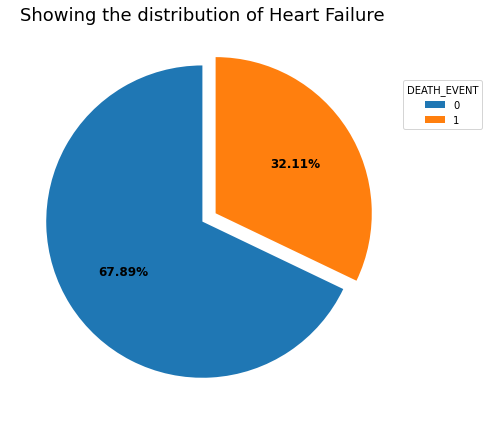

In [4]:
# Create Pie Chart showing distribution target data
# Pie chart (plots value counts in this case)
pie_data = df['DEATH_EVENT'].value_counts(normalize=True).values * 100
pie_label = df['DEATH_EVENT'].value_counts(normalize=True).index

# Show value counts in this Target
actual_values = df['DEATH_EVENT'].value_counts(dropna=True)
print(f"Actual Count :\n{actual_values} \n")


# Set figure for showing pie chart
fig, ax = plt.subplots(figsize=(8,6))

# To denote actual values instead of percentages as labels in the pie chart, reformat 
wedges, texts, autotexts = ax.pie(pie_data,
                                  startangle=90, explode=[0, 0.1],
                                  autopct='%.2f%%', textprops={'fontsize':12, 'weight':'bold'})
# Create legend
ax.legend(wedges, pie_label,
          title='DEATH_EVENT',
          loc='center left', bbox_to_anchor=(1, 0.8))

# Create title
plt.title("Showing the distribution of Heart Failure", fontsize=18)
plt.tight_layout()
plt.show()

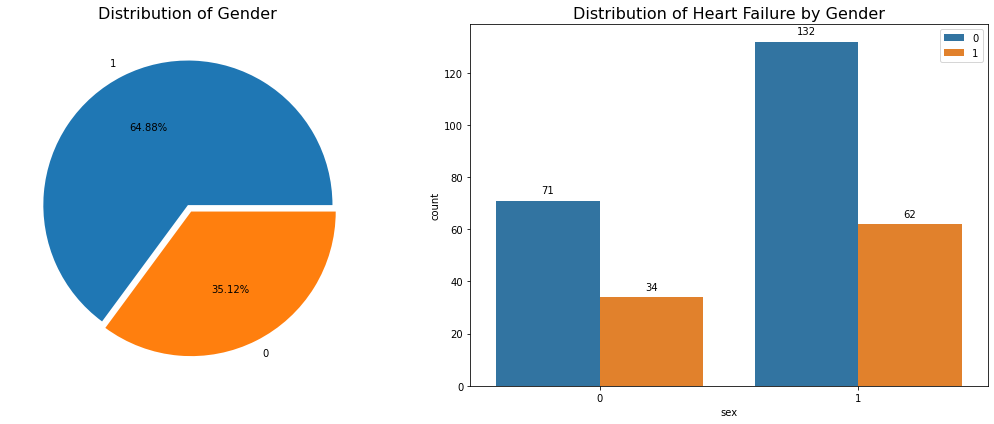

In [5]:
# Shows the Distribution of Heat Failure with respect to male and female
# plot pie chart
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.pie(df['sex'].value_counts(), labels=df['sex'].unique(), explode=(0,0.05), autopct='%.2f%%')
plt.title("Distribution of Gender", fontsize='16')

# plot countplot
plt.subplot(1,2,2)
p1 = sns.countplot(data=df, x='sex', hue='DEATH_EVENT')
plt.title("Distribution of Heart Failure by Gender", fontsize='16')
for p in p1.patches:
    p1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.legend()
plt.tight_layout()
plt.show()

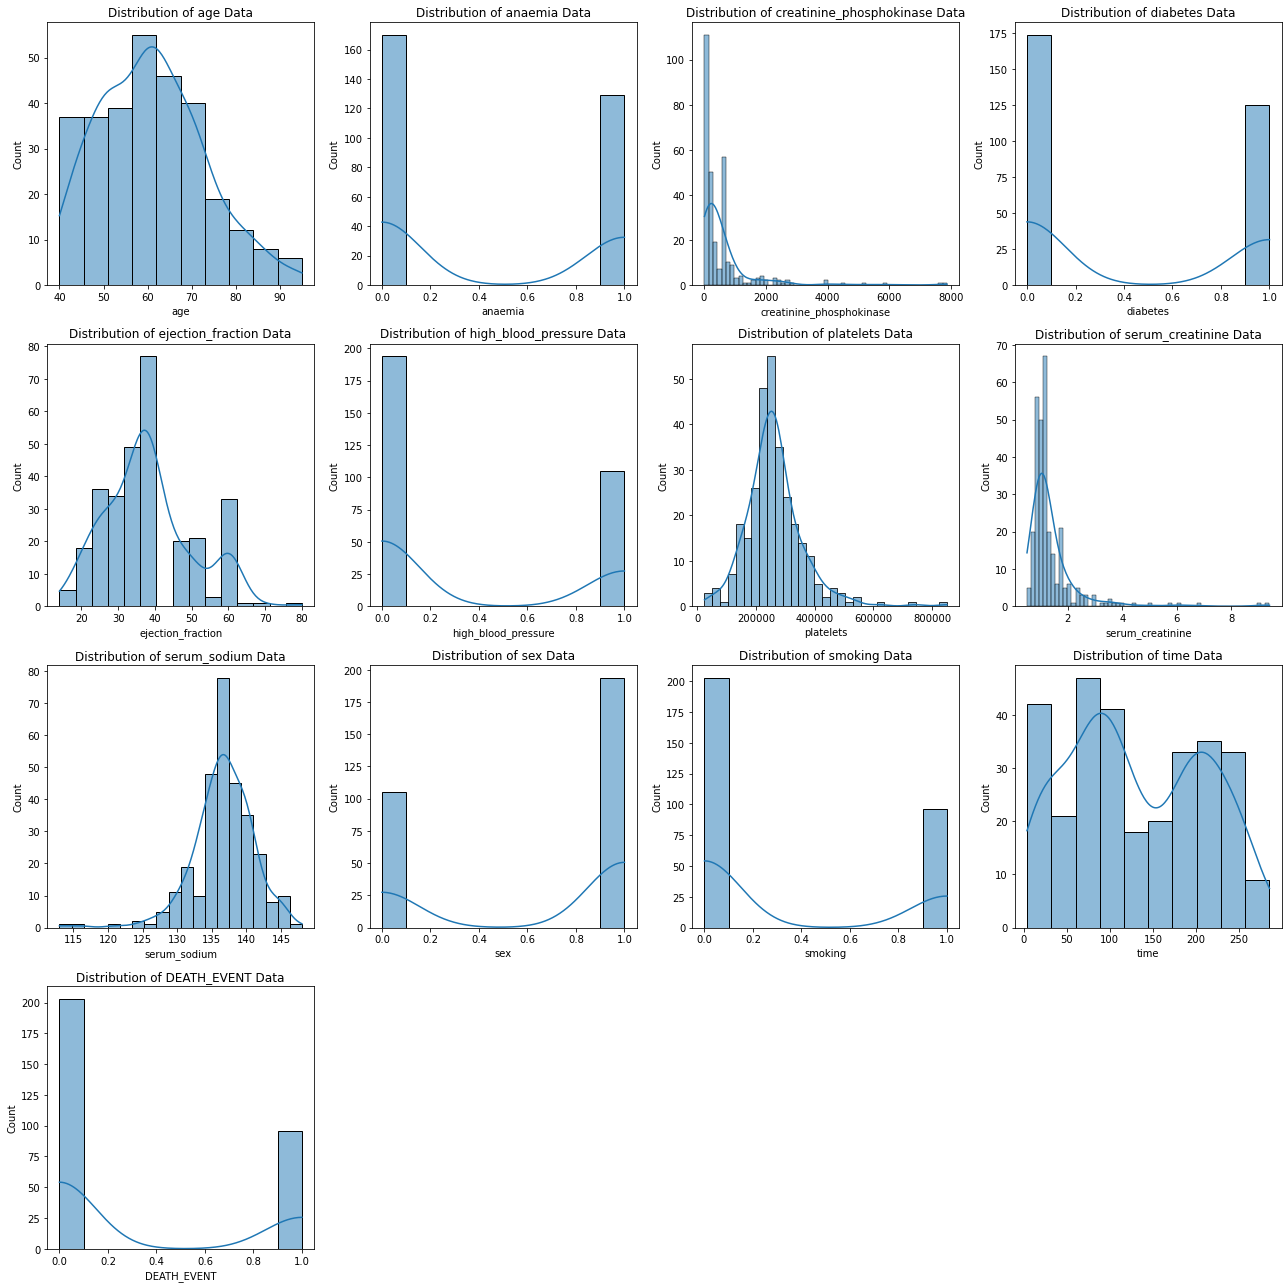

In [6]:
plt.figure(figsize=(18,18))
for i,col in enumerate(df.columns, 1):
    plt.subplot(4,4,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()
    

# Outliers

A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables.The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution.The box plot (a.k.a. box and whisker diagram) is a standardized way of displaying the distribution of data based on the five number summary:
- Minimum
- First quartile
- Median
- Third quartile
- Maximum.

In the simplest box plot the central rectangle spans the first quartile to the third quartile (the interquartile range or IQR).A segment inside the rectangle shows the median and “whiskers” above and below the box show the locations of the minimum and maximum.

In [7]:
# Create function for create histogram and boxplot
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16,4))
    
    # Create Histogram
    plt.subplot(1,2,1)
    sns.histplot(df[variable], bins=30, color='#c6c6c6')
    plt.title("Distribution of Histogram")
    
    # Create Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(df[variable], color='#4589ff')
    plt.title("Distibution of Boxplot")
    plt.show()

In [8]:
## Split data Numerical
num_columns = df.select_dtypes(include=np.number).columns.tolist()
cat_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Numerical Columns :", num_columns)
print("\n")

# Split data Categorical to binary and multiclass
binary_num_columns = [cname for cname in num_columns if len(df[cname].unique()) == 2]
multiclass_num_columns = [cname for cname in num_columns if len(df[cname].unique()) > 2]
print("Binary Categorical Columns :", binary_num_columns)
print("Multiclass Categorical Columns :", multiclass_num_columns)

Numerical Columns : ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']


Binary Categorical Columns : ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
Multiclass Categorical Columns : ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']


Tampilan sebelum di handling outliers


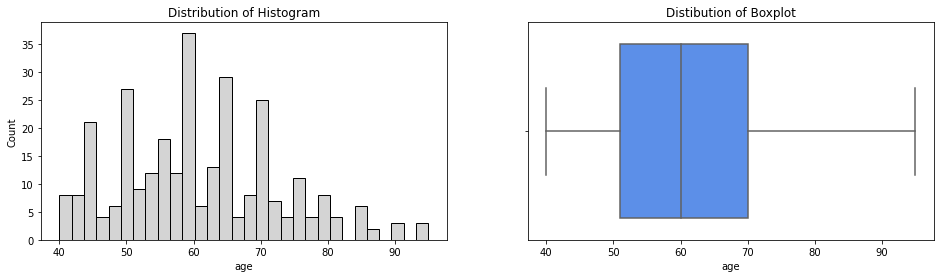

Skewness value: 0.42306190672863536


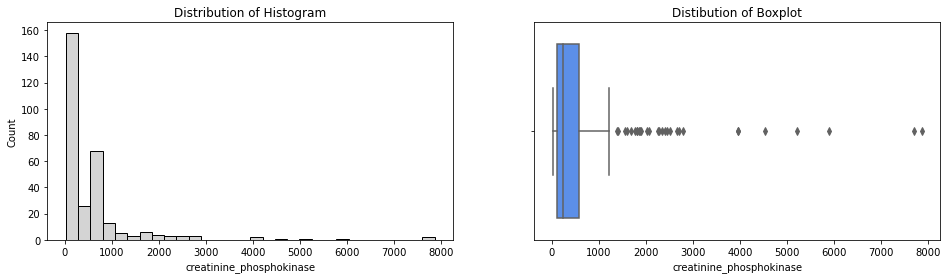

Skewness value: 4.463110084653752


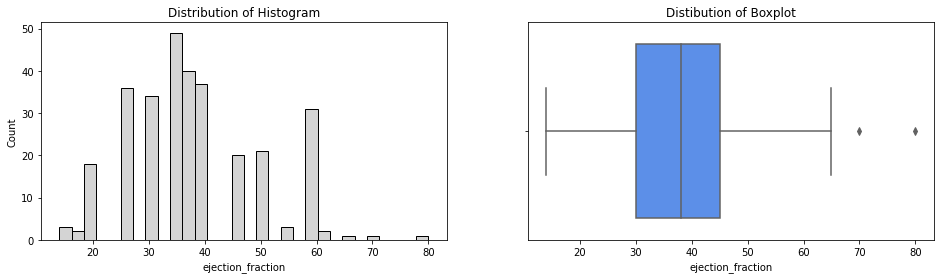

Skewness value: 0.5553827516973211


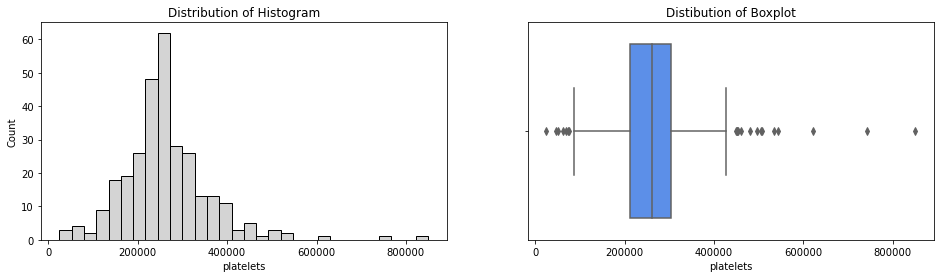

Skewness value: 1.4623208382757793


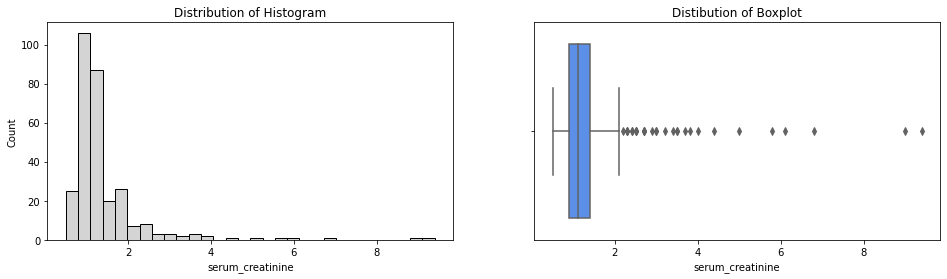

Skewness value: 4.455995882049026


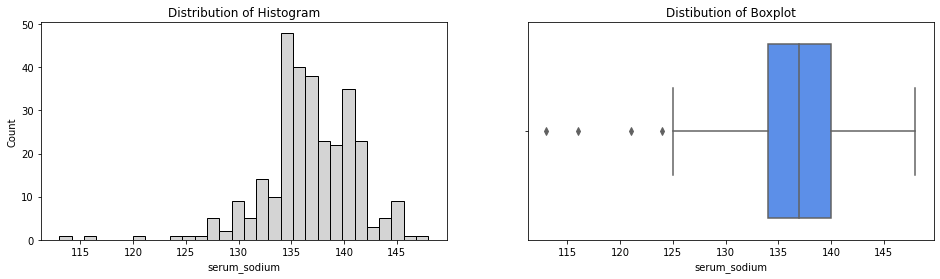

Skewness value: -1.0481360160574988


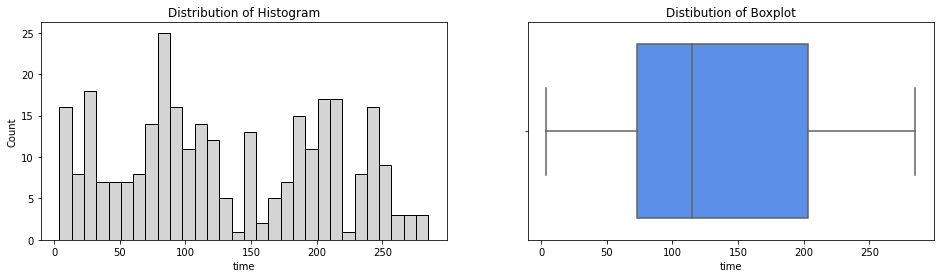

Skewness value: 0.12780264559841184


In [9]:
print("Tampilan sebelum di handling outliers")
for cols in df[multiclass_num_columns].describe().columns:
    diagnostic_plots(df[multiclass_num_columns], cols)
    print(f"Skewness value: {df[cols].skew()}")

# Data Preprocessing
Data preprocessing is an integral step in Machine Learning as the quality of data and the useful information that can be derived from it directly affects the ability of our model to learn; therefore, it is extremely important that we preprocess our data before feeding it into our model.

The concepts that I will cover in this article are
1. Splitting Data
2. Handline Outliers
3. Handling Null Values
Feature Selection
5. Feature Selection
6. Feature Scaling

## 1. Splitting Dataset

In [10]:
TEST_SIZE_RATIO = 0.33  # split into 2 equally sized train and test sets

# Setup X and y
X = df.drop(['DEATH_EVENT'], axis=1)
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE_RATIO, random_state=0)
print("X_train.shape, y_train.shape", X_train.shape, y_train.shape)
print("X_test.shape, y_test.shape", X_test.shape, y_test.shape)

X_train.shape, y_train.shape (200, 12) (200,)
X_test.shape, y_test.shape (99, 12) (99,)


## 2. Handling Outliers

In [11]:
def find_normal_distribution(df, variables):
    upper_boundary = df[variables].mean() + 3 * df[variables].std()
    lower_boundary = df[variables].mean() - 3 * df[variables].std()
    return upper_boundary, lower_boundary


## Create function for skew distribution
def find_skew_distribution(df, variable):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)
    return upper_boundary, lower_boundary

In [12]:
proses_outlier = pd.DataFrame({'columns': X_train.describe().columns, 
                               'nilai_skewness': X_train.skew(axis=0)})

In [13]:
# Split Numerical binary to new variable
X_train_new = X_train[multiclass_num_columns]

# Melakukan pengecekan nilai skewness dan memeberikan label outlier
proses_outlier = pd.DataFrame({'columns': X_train_new.describe().columns, 
                               'nilai_skewness': X_train_new.skew(axis=0)})

proses_outlier.reset_index(drop=True, inplace=True)

proses_outlier['detect'] = np.where(proses_outlier['nilai_skewness'].abs()>0.5, 
                                   'skewed', 'normal')

## Membuat fungsi untuk mencari percentage outlier
outliers = {'percentage_outlier': []}
for row in proses_outlier.index.tolist():
    col = proses_outlier.iloc[row]['columns']
    dist = proses_outlier.iloc[row]['detect']
    if dist == 'normal':
        upper_boundary, lower_boundary = find_normal_distribution(X_train_new, col)
    else:
        upper_boundary, lower_boundary = find_skew_distribution(X_train_new, col)
        
    total_right_tail = len(X_train_new[X_train_new[col] > upper_boundary])
    total_left_tail = len(X_train_new[X_train_new[col] < lower_boundary])
    total_right_tail_percent = total_right_tail/len(X_train_new)*100
    total_left_tail_percent = total_left_tail/len(X_train_new)*100
    total_outlier_percent =total_left_tail_percent + total_right_tail_percent
    outliers['percentage_outlier'].append(total_outlier_percent)
    
outliers = pd.DataFrame(outliers) # Memasukkan variabel outlier kedalam dataframe
# Melakukan penggabungan
X_train_outlier = pd.concat([proses_outlier, outliers], axis=1)
X_train_outlier['action'] = np.where(X_train_outlier['percentage_outlier']==0, 'No Action',
                                     np.where(X_train_outlier['percentage_outlier']<5, 'Trimming','Capping'))
X_train_outlier

,columns,nilai_skewness,detect,percentage_outlier,action
0,age,0.4131,normal,0.0,No Action
1,creatinine_phosphokinase,4.6676,skewed,9.5,Capping
2,ejection_fraction,0.5053,skewed,11.0,Capping
3,platelets,1.7569,skewed,7.0,Capping
4,serum_creatinine,4.2681,skewed,8.0,Capping
5,serum_sodium,-1.3355,skewed,2.0,Trimming
6,time,0.1905,normal,0.0,No Action


After we check and label the features that have skewnes, of course we will handle it with 3 methods:
1. **TRIMMING** = If outlier < 5%
2. **CAPPING** = If the outlier ranges from 5-15%
3. **KEEP** = If the outlier is >15%, we will not handle it, but we will leave it alone.

In [14]:
# Installl modul feature_engine
!pip install feature_engine

# Method Trimming
from feature_engine.outliers import OutlierTrimmer

print(f"Before trimming {X_train.shape}")

# Apabila distribusi datanya skew kita akan menggunakan 1.5 IQR
trim_skew = OutlierTrimmer(capping_method='iqr',
                          tail='both', fold=1.5,
                          variables=['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium'],
                          missing_values='ignore')
# Fit Trim
X_train_handled = trim_skew.fit_transform(X_train)

print(f"After trimming {X_train_handled.shape}")

  Using cached feature_engine-1.4.1-py2.py3-none-any.whl (276 kB)
Before trimming (200, 12)
After trimming (134, 12)


In [15]:
## Melakukan penyamaan dimensi pada y_train
y_train = y_train.drop(y_train.index.difference(X_train_handled.index))
print("MELIHAT DIMENSI TRAIN SET")
print('-'*30)
print(f"X_train dimensi : {X_train_handled.shape}")
print(f"y_train dimensi : {y_train.shape}")
print("Success Handling Outliers")

MELIHAT DIMENSI TRAIN SET
------------------------------
X_train dimensi : (134, 12)
y_train dimensi : (134,)
Success Handling Outliers


## 3. Handling Null Values

In [16]:
# Calculate mising value in data loan
percent_missing = (X_train_handled.isnull().sum() * 100 / len(X_train_handled)).round(2)
count_missing = (X_train_handled.isnull().sum())
missing_value_data = pd.DataFrame({'percent_missing': percent_missing,
                                 'count missing': count_missing})
missing_value_data.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_data.head(5)

,percent_missing,count missing
age,0.0,0
anaemia,0.0,0
creatinine_phosphokinase,0.0,0
diabetes,0.0,0
ejection_fraction,0.0,0


Allright no missing value in dataframe... let's get next step

## 4. Feature Selection

**Feature reduction** <br>
There are various popular methods for feature reduction; the feature selection technique demonstrated here comprises two methods applied in sequence:

1. Univariate feature reduction (remove low correlations with the target).
2. Feature reduction based on collinearity (for each highly correlated pair, use only the feature that correlates better with the target value).

Function correlation_matrix: X.shape, y.shape, yX.shape: (134, 12) (134,) (134, 13)



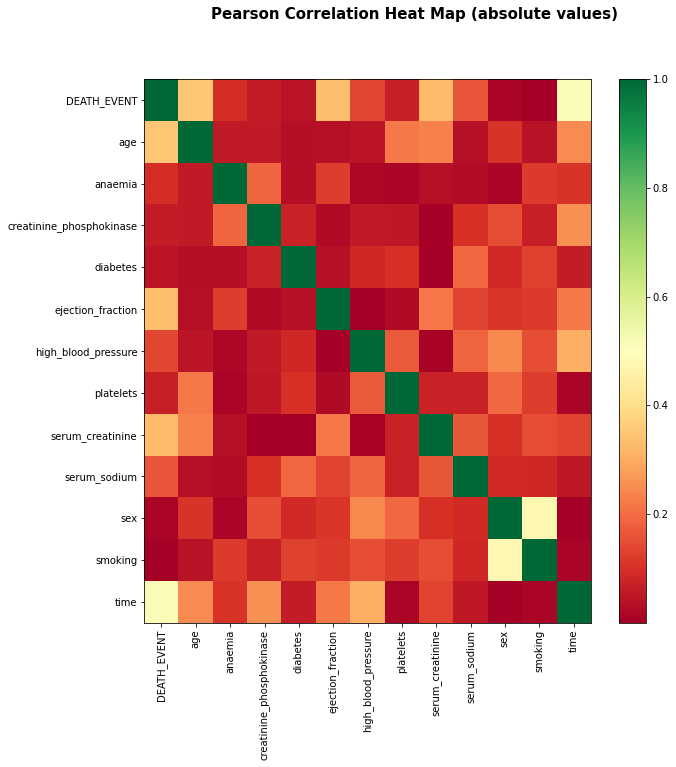

In [17]:
# Create a correlation heatmap of absolute correlation scores
def correlation_matrix(y, X, is_plot=False):
  # Calculate and plot the correlation symmetrical matrix
  # Return:
  # yX - concatenated data
  # yX_corr - correlation matrix, pearson correlation of values from -1 to +1
  # yX_abs_corr - correlation matrix, absolute values
  
  yX = pd.concat([y, X], axis=1)

  print("Function correlation_matrix: X.shape, y.shape, yX.shape:", X.shape, y.shape, yX.shape)
  print()

  # Get feature correlations and transform to dataframe
  yX_corr = yX.corr(method='pearson')

  # Convert to abolute values
  yX_abs_corr = np.abs(yX_corr) 
  
  if is_plot:
    plt.figure(figsize=(10, 10))
    plt.imshow(yX_abs_corr, cmap='RdYlGn', interpolation='none', aspect='auto')
    plt.colorbar()
    plt.xticks(range(len(yX_abs_corr)), yX_abs_corr.columns, rotation='vertical')
    plt.yticks(range(len(yX_abs_corr)), yX_abs_corr.columns);
    plt.suptitle('Pearson Correlation Heat Map (absolute values)', fontsize=15, fontweight='bold')
    plt.show()
  
  return yX, yX_corr, yX_abs_corr

# Build the correlation matrix for the train data
yX, yX_corr, yX_abs_corr = correlation_matrix(y_train, X_train_handled, is_plot=True)  

Note the high correlation values between features which are directly related to each other e.g. mean radius, mean perimeter, mean area.


### 1. Univariate feature reduction (remove low correlations with the target)

In [18]:
CORRELATION_MIN = 0.1

# Sort features by their pearson correlation with the target value
s_corr_target = yX_abs_corr['DEATH_EVENT']
s_corr_target_sort = s_corr_target.sort_values(ascending=False)

# Only use features with a minimum pearson correlation with the target of 0.1
s_low_correlation_ftrs = s_corr_target_sort[s_corr_target_sort <= CORRELATION_MIN]

# Print
print("Removed %d low correlation features:" % len(s_low_correlation_ftrs))
for i,v in enumerate(s_low_correlation_ftrs):
  print(i,np.round(v, DISPLAY_PRECISION), s_low_correlation_ftrs.index[i])
  
print("---")

s_corr_target_sort = s_corr_target_sort[s_corr_target_sort > CORRELATION_MIN]

print("Remaining %d feature correlations:" % (len(s_corr_target_sort)-1))
for i,v in enumerate(s_corr_target_sort):
  ftr = s_corr_target_sort.index[i]
  if ftr == 'DEATH_EVENT':
    continue
    
  print(i,np.round(v, DISPLAY_PRECISION), ftr)

Removed 6 low correlation features:
0 0.0974 anaemia
1 0.0674 platelets
2 0.0589 creatinine_phosphokinase
3 0.0433 diabetes
4 0.0143 sex
5 0.0022 smoking
---
Remaining 6 feature correlations:
1 0.5129 time
2 0.3492 age
3 0.3337 ejection_fraction
4 0.3253 serum_creatinine
5 0.1634 serum_sodium
6 0.1406 high_blood_pressure


### 2. Feature reduction based on collinearity (for each highly correlated pair of features, leave only the feature that correlates better with the target value).

In [19]:
CORRELATION_MAX = 0.8

# Remove features that have a low correlation with the target
li_X1_cols = list(set(s_corr_target_sort.index) - set(s_low_correlation_ftrs.index)) 
li_X1_cols.remove('DEATH_EVENT')

# Build the correlation matrix for the reduced X
X1 = X_train_handled[li_X1_cols]
yX1, yX_corr1, yX_abs_corr1 = correlation_matrix(y_train, X1, is_plot=False)  

# Get all the feature pairs
Xcorr1 = yX_abs_corr1.iloc[1:,1:]
s_pairs = Xcorr1.unstack()
print("s_pairs.shape", s_pairs.shape)
s_pairs = np.round(s_pairs, decimals=DISPLAY_PRECISION)

# Sort all the pairs by highest correlation values
s_pairs_sorted = s_pairs.sort_values(ascending=False) 
s_pairs_sorted = s_pairs_sorted[(s_pairs_sorted != 1) & (s_pairs_sorted > CORRELATION_MAX)]  # leave only the top matches that are not identical features

# Convert to a list of name tuples e.g. ('mean radius', 'mean perimeter')
li_corr_pairs = s_pairs_sorted.index.tolist()

print("len(li_corr_pairs):", len(li_corr_pairs))
print("li_corr_pairs[:10]", li_corr_pairs[:10])

Function correlation_matrix: X.shape, y.shape, yX.shape: (134, 6) (134,) (134, 7)

s_pairs.shape (36,)
len(li_corr_pairs): 0
li_corr_pairs[:10] []


For each of the highest correlated feature pairs, remove the feature that is less correlated with the target

In [20]:
# Build list of features to remove
li_remove_pair_ftrs = []
li_remove_scores = []
for tup in li_corr_pairs:
    s0 = s_corr_target_sort.loc[tup[0]]
    s1 = s_corr_target_sort.loc[tup[1]]
    remove_ftr = tup[1] if s1 < s0 else tup[0]  # get the feature that is less correlated with the target
    if remove_ftr not in li_remove_pair_ftrs:
        li_remove_pair_ftrs.append(remove_ftr)
        di = {'ftr_0':tup[0], 'ftr_1':tup[1], 'score_0':s0, 'score_1':s1, 'FEATURE_TO_REMOVE':remove_ftr}
        li_remove_scores.append(OrderedDict(di))
   
df_remove_scores = pd.DataFrame(li_remove_scores)
print("Removing %d features (see last column):" % len(li_remove_pair_ftrs))
print(df_remove_scores.to_string())
print("---")

# Remove the features that were found in the above procedure
li_X2_cols = list(set(li_X1_cols) - set(li_remove_pair_ftrs)) 
li_X2_cols.sort()

print("Remaining %d features:" % (len(li_X2_cols)))
for i,v in enumerate(s_corr_target_sort):
  ftr = s_corr_target_sort.index[i]

  if ftr in li_X2_cols:
    print(i,np.round(v, DISPLAY_PRECISION), ftr)

Removing 0 features (see last column):
Empty DataFrame
Columns: []
Index: []
---
Remaining 6 features:
1 0.5129 time
2 0.3492 age
3 0.3337 ejection_fraction
4 0.3253 serum_creatinine
5 0.1634 serum_sodium
6 0.1406 high_blood_pressure


After the pair feature reduction, X2.shape: (134, 6)
Function correlation_matrix: X.shape, y.shape, yX.shape: (134, 6) (134,) (134, 7)

Remaining features:
DEATH_EVENT            1.0000
time                   0.5129
age                    0.3492
ejection_fraction      0.3337
serum_creatinine       0.3253
serum_sodium           0.1634
high_blood_pressure    0.1406
Name: DEATH_EVENT, dtype: float64
---
After the pair feature reduction, X2.shape: (134, 6)
Function correlation_matrix: X.shape, y.shape, yX.shape: (134, 6) (134,) (134, 7)



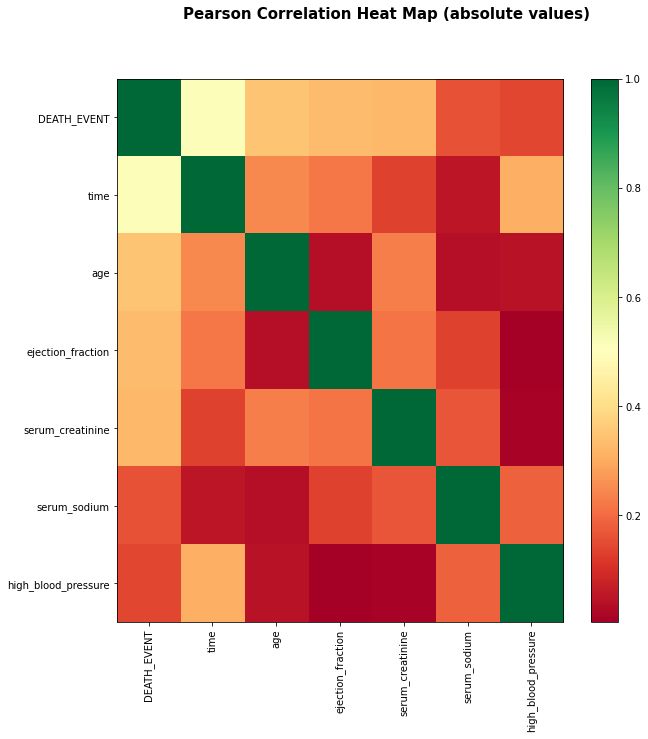

In [21]:
# Plot the correlation matrix for the final dataframe columns
# Calculate correlation matrix on the subset of features
X2 = X1[li_X2_cols]
print("After the pair feature reduction, X2.shape:", X2.shape)
yX2, yX_corr2, yX_abs_corr2 = correlation_matrix(y_train, X2)

# Recalculate the correlation matrix in order to plot the TARGET values in order of correlation
s_X3_cols = yX_abs_corr2['DEATH_EVENT'].sort_values(ascending=False)
li_X3_cols = s_X3_cols.index.tolist()
print("Remaining features:")
print(s_X3_cols)
print("---")
li_X3_cols.remove('DEATH_EVENT')

X3 = X2[li_X3_cols]
print("After the pair feature reduction, X2.shape:", X3.shape)
yX3, yX_corr3, yX_abs_corr3 = correlation_matrix(y_train, X3, is_plot=True)

X_train = X3
X_test = X_test[li_X3_cols]

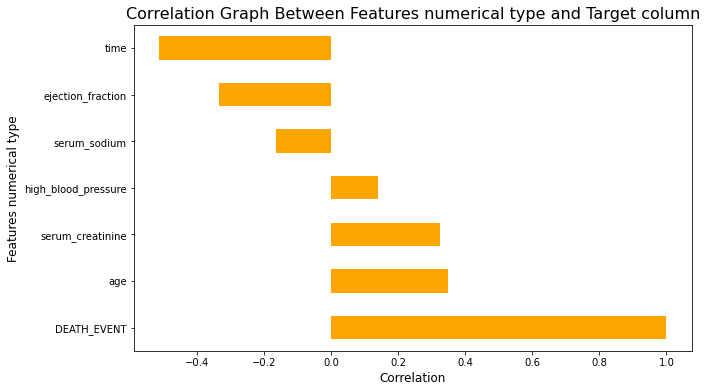

In [22]:
# Show Correlation fitrue in barchart
num = yX3.select_dtypes(exclude = 'object')
plt.figure(figsize=(10,6))
num.corr()['DEATH_EVENT'].sort_values(ascending = False).plot(kind = 'barh', color = 'orange')
plt.title('Correlation Graph Between Features numerical type and Target column', fontsize = 16)
plt.xlabel('Correlation', fontsize = 12)
plt.ylabel('Features numerical type', fontsize = 12)
plt.show()

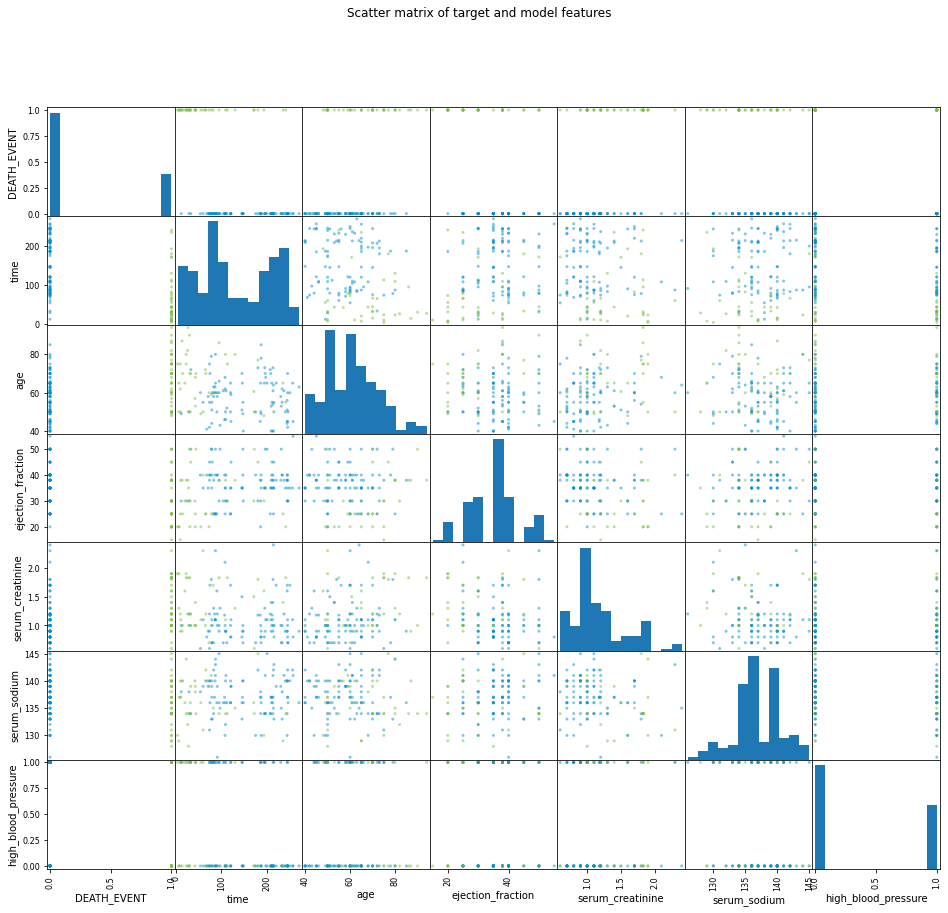

In [23]:
# Plot all the scatter matrix pairs in a single plot
color_map = {0: '#0392cf', 1: '#7bc043'}  # 0 (negative class): blue, 1 (positive class): green
colors = yX3['DEATH_EVENT'].map(lambda x: color_map.get(x))
pd.plotting.scatter_matrix(yX3, alpha=0.5, color=colors, figsize=(16,14), diagonal='hist', hist_kwds={'bins':12})
plt.suptitle('Scatter matrix of target and model features')
plt.show()

Only the subset of features shown above will be used for the model. The scatter matrix helps to understand the pairwise relationships between the features. Note that the blue dots represent negative targets and the green dots represent positive targets. The diagonal contains a histogram plot per feature.

## Feature Scaling

### Why Should we Use Feature Scaling?

The first question we need to address – why do we need to scale the variables in our dataset? Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Let me explain that in more detail.

#### 1. Distance Based Algorithms : 
    
Distance algorithms like **"KNN"**, **"K-means"** and **"SVM"** are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.
Whem two features have different scales, there is a chance that higher weightage is given to features with higher magnitude. This will impact the performance of the machine learning algorithm and obviously, we do not want our algorithm to be biassed towards one feature.

Therefore, we scale our data before employing a distance based algorithm so that all the features contribute equally to the result.

<img src="https://miro.medium.com/max/1000/0*MZKG8sTIdSNv6TXB" width=50%>


#### 2. Tree-Based Algorithms : 

Tree-based algorithms, on the other hand, are fairly insensitive to the scale of the features. Think about it, a decision tree is only splitting a node based on a single feature. The decision tree splits a node on a feature that increases the homogeneity of the node. This split on a feature is not influenced by other features.

So, there is virtually no effect of the remaining features on the split. This is what makes them invariant to the scale of the features!

<img src="https://miro.medium.com/max/925/0*U0rcW7XrdHpvI0hU.jpeg" width=70%>

## What is Standardization?

Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation

Here's the formula for Standarization:

<img src="https://clavelresearch.files.wordpress.com/2019/03/z-score-population.png" width=30%>

#### The Big Question – Normalize or Standardize?

Normalization vs. standardization is an eternal question among machine learning newcomers. Let me elaborate on the answer in this section.

- Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.

- Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.

However, at the end of the day, the choice of using normalization or standardization will depend on your problem and the machine learning algorithm you are using. There is no hard and fast rule to tell you when to normalize or standardize your data. 

### Robust Scaler
When working with outliers we can use Robust Scaling for scakling our data,
It scales features using statistics that are robust to outliers. This method removes the median and scales the data in the range between 1st quartile and 3rd quartile. i.e., in between 25th quantile and 75th quantile range. This range is also called an Interquartile range. 
The median and the interquartile range are then stored so that it could be used upon future data using the transform method. If outliers are present in the dataset, then the median and the interquartile range provide better results and outperform the sample mean and variance. 
RobustScaler uses the interquartile range so that it is robust to outliers

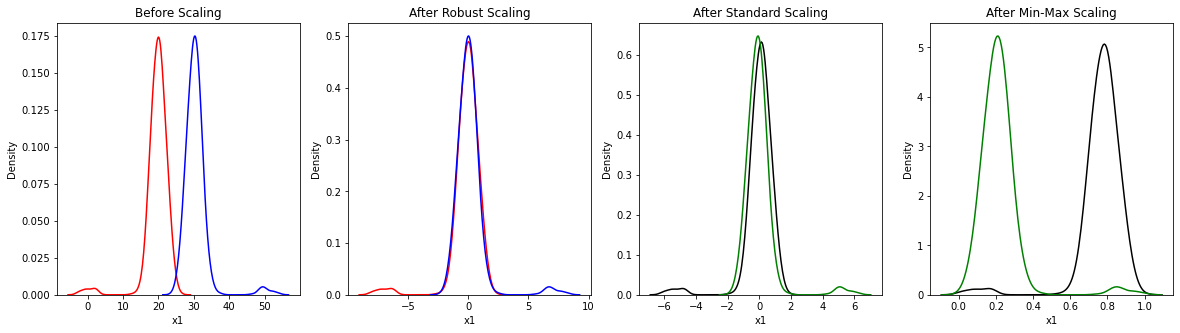

In [24]:
# data
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal
 
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])
 
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['x1', 'x2'])
 
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['x1', 'x2'])
 
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')
 
sns.kdeplot(x['x1'], ax = ax1, color ='r')
sns.kdeplot(x['x2'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')
 
sns.kdeplot(robust_df['x1'], ax = ax2, color ='red')
sns.kdeplot(robust_df['x2'], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')
 
sns.kdeplot(standard_df['x1'], ax = ax3, color ='black')
sns.kdeplot(standard_df['x2'], ax = ax3, color ='g')
ax4.set_title('After Min-Max Scaling')
 
sns.kdeplot(minmax_df['x1'], ax = ax4, color ='black')
sns.kdeplot(minmax_df['x2'], ax = ax4, color ='g')
plt.show()

### Sacling Using Standard Scaling

In [25]:
# Scaling Numercal data
# Initaiate Scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # Using fit_transform for X-train data
X_test = scaler.transform(X_test) # Using transfirm for X-test data

# Training our Machine Learning Model :

## 1.Using Logistic Regression : 

Logistic regression is a calculation used to predict a binary outcome: either something happens, or does not. This can be exhibited as Yes/No, Pass/Fail, Alive/Dead, etc. 

Independent variables are analyzed to determine the binary outcome with the results falling into one of two categories. The independent variables can be categorical or numeric, but the dependent variable is always categorical. Written like this:

P(Y=1|X) or P(Y=0|X)

It calculates the probability of dependent variable Y, given independent variable X. 

This can be used to calculate the probability of a word having a positive or negative connotation (0, 1, or on a scale between). Or it can be used to determine the object contained in a photo (tree, flower, grass, etc.), with each object given a probability between 0 and 1.

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/logistic-regression-in-machine-learning.png">

## 2. Using K-nearest Neighbors
The optimal K value usually found is the square root of N, where N is the total number of samples


K-nearest neighbors (k-NN) is a pattern recognition algorithm that uses training datasets to find the k closest relatives in future examples. 

When k-NN is used in classification, you calculate to place data within the category of its nearest neighbor. If k = 1, then it would be placed in the class nearest 1. K is classified by a plurality poll of its neighbors.

<img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final1_ibdm8a.png">


## 3.Using SVM(Support Vector Machines):

A support vector machine (SVM) uses algorithms to train and classify data within degrees of polarity, taking it to a degree beyond X/Y prediction. 

For a simple visual explanation, we’ll use two tags: red and blue, with two data features: X and Y, then train our classifier to output an X/Y coordinate as either red or blue.

<img src="https://monkeylearn.com/static/93a102a9b7b96d9047212e15b627724b/d8712/image4-3.webp" width=40%>

The SVM then assigns a hyperplane that best separates the tags. In two dimensions this is simply a line. Anything on one side of the line is red and anything on the other side is blue. In sentiment analysis, for example, this would be positive and negative.

In order to maximize machine learning, the best hyperplane is the one with the largest distance between each tag:

<img src="https://monkeylearn.com/static/e662f65502ffd24d3ee23c07efe88d9e/d8712/image3-2.webp" width=40%>

However, as data sets become more complex, it may not be possible to draw a single line to classify the data into two camps:

<img src="https://monkeylearn.com/static/5db2d9178789315ce9fa42f579c895a6/93a24/image2-3.webp" width=40%>

Using SVM, the more complex the data, the more accurate the predictor will become. Imagine the above in three dimensions, with a Z-axis added, so it becomes a circle.

Mapped back to two dimensions with the best hyperplane, it looks like this

<img src="https://monkeylearn.com/static/583405ebadf21c9691030ec4bb875e48/93a24/image6-2.webp" width=40%>

SVM allows for more accurate machine learning because it’s multidimensional.

We need to choose the best Kernel according to our need.
- The linear kernel is mostly preferred for text classification problems as it performs well for large datasets.
- Gaussian kernels tend to give good results when there is no additional information regarding data that is not available.
- Rbf kernel is also a kind of Gaussian kernel which projects the high dimensional data and then searches a linear separation for it.
- Polynomial kernels give good results for problems where all the training data is normalized.

## TREE BASED ALGORITHM

## 1. Using Decission tree Classifier
A decision tree is a supervised learning algorithm that is perfect for classification problems, as it’s able to order classes on a precise level. It works like a flow chart, separating data points into two similar categories at a time from the “tree trunk” to “branches,” to “leaves,” where the categories become more finitely similar. This creates categories within categories, allowing for organic classification with limited human supervision.

## 2. Using Random Forest Classifier

Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction (see figure below).

<img src="https://miro.medium.com/max/5752/1*5dq_1hnqkboZTcKFfwbO9A.png" width=70%>

The fundamental concept behind random forest is a simple but powerful one — the wisdom of crowds. In data science speak, the reason that the random forest model works so well is:

>A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.

The low correlation between models is the key. Just like how investments with low correlations (like stocks and bonds) come together to form a portfolio that is greater than the sum of its parts, uncorrelated models can produce ensemble predictions that are more accurate than any of the individual predictions. The reason for this wonderful effect is that the trees protect each other from their individual errors (as long as they don’t constantly all err in the same direction). While some trees may be wrong, many other trees will be right, so as a group the trees are able to move in the correct direction. 

The Finall Model wii I use:
1. Logistic Regression
2. KNN
3. SVM
4. Decesion Tree
5. Random Forest

In [26]:
# Train data
print("X_train.shape, y_train.shape", X_train.shape, y_train.shape)

## Print the class distribution of the TARGET for both train and test sets
val_cnts = y_train.value_counts()
print("Class distribution of positive and negative samples in the train set:")
print(val_cnts)
print("Percentage of positive class samples: %s" % "%2f%%" % (100 * val_cnts[1] / len(y_train)))

print("---")
print("X_test.shape, y_test.shape", X_test.shape, y_test.shape)

val_cnts = y_test.value_counts()
print("Class distribution of positive and negative samples in the test set:")
print(val_cnts)
print("Percentage of positive class samples: %s" % "%2f%%" % (100 * val_cnts[1] / len(y_test)))

X_train.shape, y_train.shape (134, 6) (134,)
Class distribution of positive and negative samples in the train set:
0    95
1    39
Name: DEATH_EVENT, dtype: int64
Percentage of positive class samples: 29.104478%
---
X_test.shape, y_test.shape (99, 6) (99,)
Class distribution of positive and negative samples in the test set:
0    68
1    31
Name: DEATH_EVENT, dtype: int64
Percentage of positive class samples: 31.313131%


Note that in some cases it is easier to train a model if we maintain an exact balance of train and test target values (a stratified sample). Here the positive to negative class ratio happens to already be quite well balanced in the train and test sets.

## 1. Build Model Logistic Regression

In [27]:
# Import module 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score,  f1_score, accuracy_score

# Define Model 
clf_log = LogisticRegression()

# Training Model Logistic Regression to data train
clf_log.fit(X_train, y_train)



LogisticRegression()

## 2. Build Model KNN


In [28]:
# Import Model
from sklearn.neighbors import KNeighborsClassifier

# Define Model
clf_knn = KNeighborsClassifier()

# Training Model KneighboarsClassifier
clf_knn.fit(X_train, y_train)

KNeighborsClassifier()

## 3. Build Model SVM Classifier

In [29]:
# Import Model from sklearn
from sklearn.svm import SVC

# Define Model
clf_svc = SVC(probability=True)

# Training Model SVC
clf_svc.fit(X_train, y_train)

SVC(probability=True)

## 4. Build Model Decesion Tree

In [30]:
# Import Model from sklearn
from sklearn.tree import DecisionTreeClassifier

# Define Model
clf_dc = DecisionTreeClassifier()

# Training model DecisionTree
clf_dc.fit(X_train, y_train)

DecisionTreeClassifier()

## 5. Build Model RandomFores Classifier

In [31]:
# Import Model from sklearn
from sklearn.ensemble import RandomForestClassifier

# Define Model
clf_rf = RandomForestClassifier()

# Training Model RandomForestClassifier
clf_rf.fit(X_train, y_train)

RandomForestClassifier()

# Evaluation Model

## Choosing the best Evaluation Matrix:

If we talk about classification problems, the most common metrics used are:
- Accuracy
- Precision (P)
- Recall (R)
- F1 score (F1)
- Area under the ROC (Receiver Operating Characteristic) curve or simply AUC (AUC):
    - If we calculate the area under the ROC curve, we are calculating another metric which is used very often when you have a dataset which has skewed binary targets. This metric is known as the Area Under ROC Curve or Area Under Curve or just simply AUC. There are many ways to calculate the area under the ROC curve
    - AUC is a widely used metric for skewed binary classification tasks in the industry,and a metric everyone should know about

- Log loss
    > Log Loss = - 1.0 * ( target * log(prediction) + (1 - target) * log(1 - prediction) )

Most of the metrics that we discussed until now can be converted to a multi-class version. The idea is quite simple. Let’s take precision and recall. We can calculate precision and recall for each class in a multi-class classification problem

- **Mcro averaged precision**: calculate precision for all classes individually and then average them
- **Micro averaged precision**: calculate class wise true positive and false positive and then use that to calculate overall precision
- **Weighted precision**: same as macro but in this case, it is weighted average depending on the number of items in each class

<img src="https://cdn-images-1.medium.com/max/800/1*1WPbfzztdv50V22TpA6njw.png">


In [45]:
# Plot Evaluate Model
def plot_roc_and_precision_recall(y_true, y_score):
  # Get ROC curve FPR and TPR from true labels vs score values
  fpr, tpr, _ = roc_curve(y_true, y_score)

  # Calculate ROC Area Under the Curve (AUC) from FPR and TPR data points
  roc_auc = auc(fpr, tpr)

  # Calculate precision and recall from true labels vs score values
  precision, recall, _ = precision_recall_curve(y_true, y_score)

  plt.figure(figsize=(8, 3))

  plt.subplot(1,2,1)
  lw = 2
  plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (AUC = %0.4f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend(loc="lower right")
  plt.grid(True)

  plt.subplot(1,2,2)
  plt.step(recall, precision, color='orange', where='post')
  # plt.fill_between(recall, precision, step='post', alpha=0.5, color='orange')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.ylim([0.0, 1.05])
  plt.xlim([0.0, 1.0])
  plt.title('Precision Recall Curve')
  plt.grid(True)

  left  = 0.125  # the left side of the subplots of the figure
  right = 0.9    # the right side of the subplots of the figure
  bottom = 0.1   # the bottom part of the subplots of the figure
  top = 0.9      # the top part of the subplots of the figure
  wspace = 0.5   # the amount of width reserved for blank space between subplots
  hspace = 0.2   # the amount of height reserved for white space between subplots
  plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
  plt.show()

    

accuracy_train = []
accuracy_test = []
precision = []
recall = []
f_1_score = []

def evalute_model(list_model):
    for s_clf in list_model:
        # model predict for data Train and Test
        clf = eval(s_clf)
        y_pred_train = clf.predict(X_train).astype(int) # returns a class decision based on the value of the predicted probability
        y_pred = clf.predict(X_test).astype(int) # returns a class decision based on the value of the predicted probability
        y_score = clf.predict_proba(X_test) # returns the value of the predicted probability

        # Add to list all metrics avaluasi
        accuracy_train.append(round(accuracy_score(y_train, y_pred_train),2)) # add to list accuracy score from train dataset
        accuracy_test.append(round(accuracy_score(y_test, y_pred),2)) # add to list accuracy score from test dataset
        precision.append(round(precision_score(y_test, y_pred, average="binary"),2)) # add precision score from test dataset
        recall.append(round(recall_score(y_test, y_pred, average="binary"),2)) # add recal score from test dataset
        f_1_score.append(round(f1_score(y_test, y_pred, average='binary'),2)) # add f1-score from test dataset
    
        print("MODEL: " + s_clf) 
        print("--------------")
        plot_roc_and_precision_recall(y_test, y_score[:,1])  # provide the column for the scores belonging only to the positive class
        print()
        print("CONFUSION MATRIX: " + s_clf)
        print('-'*35)
        ax = plt.subplot()
        cm = confusion_matrix(y_test, y_pred) # Create confusion matrix
        sns.heatmap(cm, annot=True, fmt='g', ax=ax);
        # labels, title and ticks
        ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
        ax.set_title('Confusion Matrix'); 
        plt.show()
        print()
        print('Classification Report: ' + s_clf) 
        print('-'*35)
        print(classification_report(y_test, y_pred)) # evaluate model using classification report
        print()
        print("="*50)

MODEL: clf_log
--------------


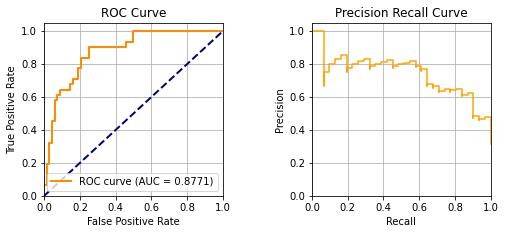


CONFUSION MATRIX: clf_log
-----------------------------------


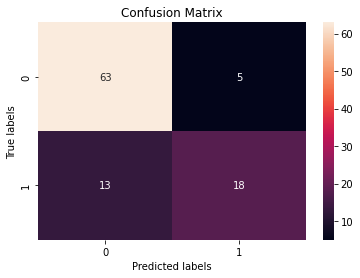


Classification Report: clf_log
-----------------------------------
              precision    recall  f1-score   support

           0       0.83      0.93      0.88        68
           1       0.78      0.58      0.67        31

    accuracy                           0.82        99
   macro avg       0.81      0.75      0.77        99
weighted avg       0.81      0.82      0.81        99


MODEL: clf_knn
--------------


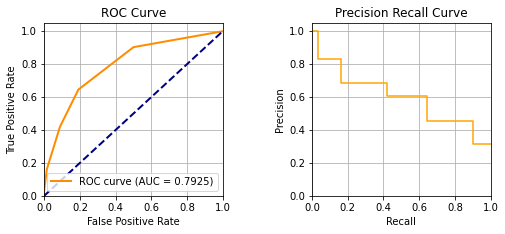


CONFUSION MATRIX: clf_knn
-----------------------------------


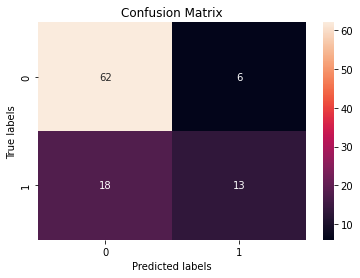


Classification Report: clf_knn
-----------------------------------
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        68
           1       0.68      0.42      0.52        31

    accuracy                           0.76        99
   macro avg       0.73      0.67      0.68        99
weighted avg       0.75      0.76      0.74        99


MODEL: clf_svc
--------------


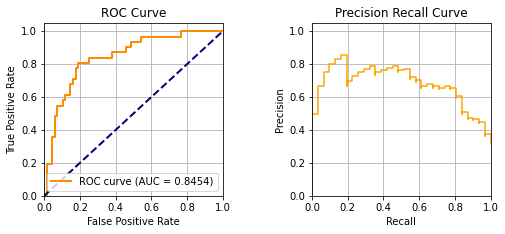


CONFUSION MATRIX: clf_svc
-----------------------------------


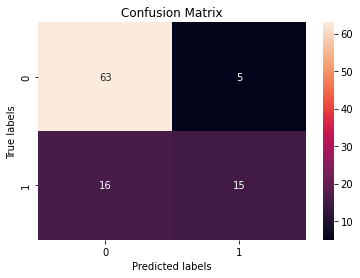


Classification Report: clf_svc
-----------------------------------
              precision    recall  f1-score   support

           0       0.80      0.93      0.86        68
           1       0.75      0.48      0.59        31

    accuracy                           0.79        99
   macro avg       0.77      0.71      0.72        99
weighted avg       0.78      0.79      0.77        99


MODEL: clf_dc
--------------


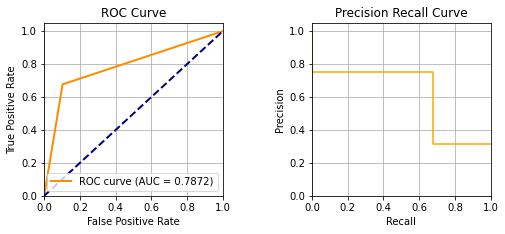


CONFUSION MATRIX: clf_dc
-----------------------------------


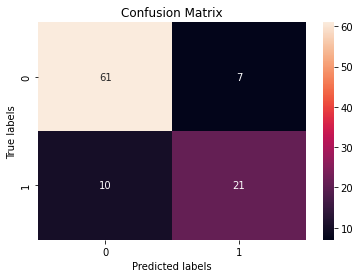


Classification Report: clf_dc
-----------------------------------
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        68
           1       0.75      0.68      0.71        31

    accuracy                           0.83        99
   macro avg       0.80      0.79      0.79        99
weighted avg       0.82      0.83      0.83        99


MODEL: clf_rf
--------------


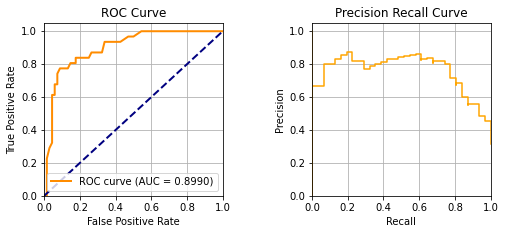


CONFUSION MATRIX: clf_rf
-----------------------------------


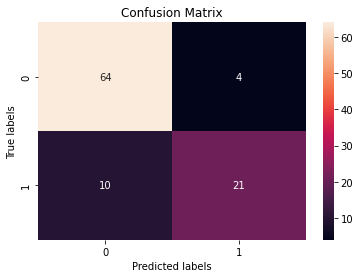


Classification Report: clf_rf
-----------------------------------
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        68
           1       0.84      0.68      0.75        31

    accuracy                           0.86        99
   macro avg       0.85      0.81      0.83        99
weighted avg       0.86      0.86      0.85        99




In [46]:
evalute_model(['clf_log', 'clf_knn', 'clf_svc', 'clf_dc', 'clf_rf'])

### Model Comparison (Default Params)

In [47]:
# Make dataframe for metriks eval
model_default = pd.DataFrame({'Model': ['Logistic Regression', 'KNN', 'SVC', 'Decision Tree', 'Random Forest'],
                          'Train Accuracy' : accuracy_train,
                          'Test Accuracy': accuracy_test,
                          'Precison': precision,
                          'Recall': recall,
                          'F1 SCORE': f_1_score})

# Sort metriks recall in ASC
model_default.sort_values(by='Recall', ascending=False)

,Model,Train Accuracy,Test Accuracy,Precison,Recall,F1 SCORE
3,Decision Tree,1.00,0.83,0.75,0.68,0.71
4,Random Forest,1.00,0.86,0.84,0.68,0.75
0,Logistic Regression,0.85,0.82,0.78,0.58,0.67
2,SVC,0.89,0.79,0.75,0.48,0.59
1,KNN,0.85,0.76,0.68,0.42,0.52


# Tuning Model

## Hyperparameter optimization
In machine learning, hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process. By contrast, the values of other parameters (typically node weights) are learned.

The same kind of machine learning model can require different constraints, weights or learning rates to generalize different data patterns. These measures are called hyperparameters, and have to be tuned so that the model can optimally solve the machine learning problem. Hyperparameter optimization finds a tuple of hyperparameters that yields an optimal model which minimizes a predefined loss function on given independent data. The objective function takes a tuple of hyperparameters and returns the associated loss. Cross-validation is often used to estimate this generalization performance.

## Approaches

### **Grid search**

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Hyperparameter_Optimization_using_Grid_Search.svg/220px-Hyperparameter_Optimization_using_Grid_Search.svg.png" width=40%>

Grid search across different values of two hyperparameters. For each hyperparameter, 10 different values are considered, so a total of 100 different combinations are evaluated and compared. Blue contours indicate regions with strong results, whereas red ones show regions with poor results.

### **Random search**


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Hyperparameter_Optimization_using_Random_Search.svg/220px-Hyperparameter_Optimization_using_Random_Search.svg.png" width=40%>

Random search across different combinations of values for two hyperparameters. In this example, 100 different random choices are evaluated. The green bars show that more individual values for each hyperparameter are considered compared to a grid search.


Source : Wikipedia [Hyperparameter](https://en.wikipedia.org/wiki/Hyperparameter_optimization)

## Logistic Regression Tuning

### Tuning parameter **Ligistic Regression** Using `Random Search`

In [35]:
import time
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# Use the random grid to search for best hyperparameters
# define models and parameters
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2','l1']
c_values = [1000, 100, 10, 1.0, 0.1, 0.01]

# define random search
grid = {'solver': solvers,
        'penalty': penalty,
        'C': c_values
}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
rs_log = RandomizedSearchCV(estimator=clf_log, param_distributions=grid, n_jobs=-1, cv=cv, scoring='recall',random_state=42, error_score=0, verbose=True)
%time rs_log.fit(X_train, y_train) # Fit the random

# summarize results
print("Best: %f using %s" % (rs_log.best_score_, rs_log.best_params_))
means = rs_log.cv_results_['mean_test_score']
stds = rs_log.cv_results_['std_test_score']
params = rs_log.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 15 folds for each of 10 candidates, totalling 150 fits
Wall time: 4.49 s
Best: 0.648810 using {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}
0.000000 (0.000000) with: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.01}
0.607143 (0.216555) with: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 10}
0.648810 (0.198385) with: {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}
0.025000 (0.050000) with: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.01}
0.000000 (0.000000) with: {'solver': 'lbfgs', 'penalty': 'l1', 'C': 10}
0.025000 (0.050000) with: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.01}
0.000000 (0.000000) with: {'solver': 'newton-cg', 'penalty': 'l1', 'C': 1.0}
0.607143 (0.216555) with: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 10}
0.615476 (0.209760) with: {'solver': 'liblinear', 'penalty': 'l2', 'C': 100}
0.607143 (0.216555) with: {'solver': 'liblinear', 'penalty': 'l1', 'C': 10}


### After Tuning using `Random Search` next we will tuning use `Grid Search`

In [36]:
# Create grid parameter for GridSearch
grid_param = {
    'solver':[rs_log.best_params_['solver']],
    'penalty':[rs_log.best_params_['penalty']],
    'C':[1000, 100, 10, 1, 0.1, 0.01, 0.001]
}
# Define Cross Validation 
cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=1)
gs_log = GridSearchCV(estimator=clf_log, param_grid=grid_param, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0, verbose=True)
%time gs_log.fit(X_train, y_train) # Training Model Grid Params

# summarize results
print("Best: %f using %s" % (gs_log.best_score_, gs_log.best_params_))
means = gs_log.cv_results_['mean_test_score']
stds = gs_log.cv_results_['std_test_score']
params = gs_log.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 45 folds for each of 7 candidates, totalling 315 fits
Wall time: 622 ms
Best: 0.888095 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.868783 (0.134839) with: {'C': 1000, 'penalty': 'l2', 'solver': 'liblinear'}
0.868783 (0.134839) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.868783 (0.134839) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.867196 (0.135210) with: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
0.877160 (0.134998) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.888095 (0.124703) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.884921 (0.124519) with: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}


After tuning and see, the score was improve and get the better parameters.

## KNN Tuning

###  Tuning parameter **KNN** Using `Random Search`

In [37]:
# Use the random grid to search for best hyperparameters
weights = ['uniform', 'distance'] # define parameter to list for tunning
n_neighbors = [2, 3, 5, 7, 8, 10, 15] # define parameter ti list for tunning

# define random search
grid = {'weights': weights,
        'n_neighbors': n_neighbors
}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
rs_knn = RandomizedSearchCV(estimator=clf_knn, param_distributions=grid, n_jobs=-1, cv=cv, scoring='recall',random_state=42, error_score=0, verbose=True)
%time rs_knn.fit(X_train, y_train) # Fit the random

# summarize results
print("Best: %f using %s" % (rs_knn.best_score_, rs_knn.best_params_))
means = rs_knn.cv_results_['mean_test_score']
stds = rs_knn.cv_results_['std_test_score']
params = rs_knn.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 15 folds for each of 10 candidates, totalling 150 fits
Wall time: 498 ms
Best: 0.553571 using {'weights': 'uniform', 'n_neighbors': 3}
0.489286 (0.183480) with: {'weights': 'distance', 'n_neighbors': 8}
0.496429 (0.161992) with: {'weights': 'distance', 'n_neighbors': 10}
0.307143 (0.161203) with: {'weights': 'uniform', 'n_neighbors': 2}
0.342857 (0.183989) with: {'weights': 'uniform', 'n_neighbors': 15}
0.538095 (0.202227) with: {'weights': 'distance', 'n_neighbors': 5}
0.369048 (0.190848) with: {'weights': 'uniform', 'n_neighbors': 8}
0.553571 (0.159586) with: {'weights': 'uniform', 'n_neighbors': 3}
0.539286 (0.133503) with: {'weights': 'distance', 'n_neighbors': 2}
0.385714 (0.173964) with: {'weights': 'distance', 'n_neighbors': 15}
0.529762 (0.211154) with: {'weights': 'uniform', 'n_neighbors': 5}


###  Tuning parameter **KNN** Using `GridSearch`

In [38]:
# Create parameter for gridserch 
param_grid = {
    'weights':[rs_knn.best_params_['weights']],
    'n_neighbors': [2,3,4,5]
}

# Define Cross Validation 
cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=1)
gs_knn = GridSearchCV(estimator=clf_knn, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0, verbose=True)
%time gs_knn.fit(X_train, y_train) # Training Model Grid Params

# summarize results
print("Best: %f using %s" % (gs_knn.best_score_, gs_knn.best_params_))
means = gs_knn.cv_results_['mean_test_score']
stds = gs_knn.cv_results_['std_test_score']
params = gs_knn.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Fitting 45 folds for each of 4 candidates, totalling 180 fits
Wall time: 420 ms
Best: 0.819224 using {'n_neighbors': 3, 'weights': 'uniform'}
0.754762 (0.165196) with: {'n_neighbors': 2, 'weights': 'uniform'}
0.819224 (0.154087) with: {'n_neighbors': 3, 'weights': 'uniform'}
0.817240 (0.149923) with: {'n_neighbors': 4, 'weights': 'uniform'}
0.809612 (0.150353) with: {'n_neighbors': 5, 'weights': 'uniform'}


## SVC Tuning

### Tuning Parameter **SVC** Using `RandomSearch`

In [39]:
# Use the random grid to search for best hyperparameters
kernel = ['linear', 'poly', 'rbf', 'sigmoid'] # define parameter to list for tunning
C = [100, 20, 10, 5, 1, 0.5, 0.01] # define parameter ti list for tunning
# define random search
grid = {'kernel': kernel,
        'C': C
}
# Define cross validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
rs_svc = RandomizedSearchCV(estimator=clf_svc, param_distributions=grid, n_jobs=-1, cv=cv, scoring='recall',random_state=42, error_score=0, verbose=True)
%time rs_svc.fit(X_train, y_train) # Fit the random

# summarize results
print("Best: %f using %s" % (rs_svc.best_score_, rs_svc.best_params_))
means = rs_svc.cv_results_['mean_test_score']
stds = rs_svc.cv_results_['std_test_score']
params = rs_svc.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 15 folds for each of 10 candidates, totalling 150 fits
Wall time: 1.81 s
Best: 0.673810 using {'kernel': 'sigmoid', 'C': 10}
0.600000 (0.157548) with: {'kernel': 'poly', 'C': 10}
0.000000 (0.000000) with: {'kernel': 'poly', 'C': 0.01}
0.641667 (0.155329) with: {'kernel': 'linear', 'C': 10}
0.419048 (0.168636) with: {'kernel': 'poly', 'C': 0.5}
0.641667 (0.155329) with: {'kernel': 'linear', 'C': 100}
0.641667 (0.155329) with: {'kernel': 'linear', 'C': 5}
0.434524 (0.181718) with: {'kernel': 'poly', 'C': 1}
0.547619 (0.162185) with: {'kernel': 'rbf', 'C': 0.5}
0.673810 (0.123282) with: {'kernel': 'sigmoid', 'C': 10}
0.563095 (0.156066) with: {'kernel': 'poly', 'C': 5}


### Tuning Parameter **SVC** Using `GridSearch`

In [40]:
# Create parameter for gridserch 
param_grid = {
    'kernel':[rs_svc.best_params_['kernel']],
    'C': [7, 10, 13, 15, 18, 21]
}

# Define Cross Validation 
cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=1)
gs_svc = GridSearchCV(estimator=clf_svc, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0, verbose=True)
%time gs_svc.fit(X_train, y_train) # Training Model Grid Params

# summarize results
print("Best: %f using %s" % (gs_svc.best_score_, gs_svc.best_params_))
means = gs_svc.cv_results_['mean_test_score']
stds = gs_svc.cv_results_['std_test_score']
params = gs_svc.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Fitting 45 folds for each of 6 candidates, totalling 270 fits
Wall time: 783 ms
Best: 0.861464 using {'C': 7, 'kernel': 'sigmoid'}
0.861464 (0.145858) with: {'C': 7, 'kernel': 'sigmoid'}
0.850882 (0.150339) with: {'C': 10, 'kernel': 'sigmoid'}
0.856349 (0.157929) with: {'C': 13, 'kernel': 'sigmoid'}
0.842416 (0.151656) with: {'C': 15, 'kernel': 'sigmoid'}
0.855115 (0.156574) with: {'C': 18, 'kernel': 'sigmoid'}
0.837654 (0.159267) with: {'C': 21, 'kernel': 'sigmoid'}


## Decision Tree Tuning

### Tuning Parameter **Decision Tree** using `RandomSearch`

In [41]:
# Use the random grid to search for best hyperparameters
criterion = ['gini', 'entropy'] # define parameter to list for tunning
max_depth = [1000, 600, 200, 100, 80, 50, 20] # define parameter ti list for tunning
min_samples_split = [2, 4, 6, 8, 10]
min_samples_leaf = [1, 2, 3]

# define random search
grid = {'criterion': criterion,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf
}

# Define cross validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
rs_dc = RandomizedSearchCV(estimator=clf_dc, param_distributions=grid, n_jobs=-1, cv=cv, scoring='recall',random_state=42, error_score=0, verbose=True)
%time rs_dc.fit(X_train, y_train) # Fit the random

# summarize results
print("Best: %f using %s" % (rs_dc.best_score_, rs_dc.best_params_))
means = rs_dc.cv_results_['mean_test_score']
stds = rs_dc.cv_results_['std_test_score']
params = rs_dc.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 15 folds for each of 10 candidates, totalling 150 fits
Wall time: 250 ms
Best: 0.639286 using {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 100, 'criterion': 'gini'}
0.630952 (0.161791) with: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 200, 'criterion': 'gini'}
0.555952 (0.162734) with: {'min_samples_split': 6, 'min_samples_leaf': 2, 'max_depth': 80, 'criterion': 'entropy'}
0.590476 (0.196208) with: {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 50, 'criterion': 'gini'}
0.570238 (0.192379) with: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 20, 'criterion': 'entropy'}
0.613095 (0.177696) with: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 80, 'criterion': 'gini'}
0.623810 (0.217287) with: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 100, 'criterion': 'entropy'}
0.639286 (0.151270) with: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 100, 'criterion': 'gini'}
0.582143 (0.1

### Tuning Parameter **Decision Tree** using `Gridsearch`

In [42]:
# Create parameter for gridserch 
param_grid = {
    'criterion':[rs_dc.best_params_['criterion']],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [1,2,3],
    'max_depth':[50,60,70,80,90,100]
}

# Define Cross Validation 
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
gs_dc = GridSearchCV(estimator=clf_dc, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0, verbose=True)
%time gs_dc.fit(X_train, y_train) # Training Model Grid Params

# summarize results
print("Best: %f using %s" % (gs_dc.best_score_, gs_dc.best_params_))
means = gs_dc.cv_results_['mean_test_score']
stds = gs_dc.cv_results_['std_test_score']
params = gs_dc.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Fitting 15 folds for each of 54 candidates, totalling 810 fits
Wall time: 1.39 s
Best: 0.814286 using {'criterion': 'gini', 'max_depth': 80, 'min_samples_leaf': 3, 'min_samples_split': 2}
0.734649 (0.090470) with: {'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.748496 (0.100815) with: {'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 3}
0.735464 (0.075301) with: {'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 4}
0.770927 (0.092929) with: {'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.760996 (0.106450) with: {'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 2, 'min_samples_split': 3}
0.784179 (0.125057) with: {'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 2, 'min_samples_split': 4}
0.804543 (0.108489) with: {'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 3, 'min_samples_split': 2}
0.808803 (0.101351) with: {'

## Random Forest Tuning

### Tuning parameter **Random Forest** using `Randomsearch`

In [43]:
# Use the random grid to search for best hyperparameters
criterion = ['gini', 'entropy'] # define parameter to list for tunning
max_depth = [1000, 600, 200, 100, 80, 50, 20] # define parameter ti list for tunning
n_estimators = [2000,1000,500, 100, 50]
min_samples_split = [2, 4, 6, 8, 10]
min_samples_leaf = [1, 2, 3]

# define random search
grid = {'criterion': criterion,
        'max_depth': max_depth,
        'n_estimators':n_estimators,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf
}

# Define cross validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
rs_rf = RandomizedSearchCV(estimator=clf_rf, param_distributions=grid, n_jobs=-1, cv=cv, scoring='recall',random_state=42, error_score=0, verbose=True)
%time rs_rf.fit(X_train, y_train) # Fit the random

# summarize results
print("Best: %f using %s" % (rs_rf.best_score_, rs_rf.best_params_))
means = rs_rf.cv_results_['mean_test_score']
stds = rs_rf.cv_results_['std_test_score']
params = rs_rf.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 15 folds for each of 10 candidates, totalling 150 fits
Wall time: 1min 50s
Best: 0.692857 using {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 600, 'criterion': 'gini'}
0.651190 (0.153040) with: {'n_estimators': 2000, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_depth': 80, 'criterion': 'entropy'}
0.684524 (0.163750) with: {'n_estimators': 50, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_depth': 20, 'criterion': 'entropy'}
0.692857 (0.169934) with: {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 600, 'criterion': 'gini'}
0.676190 (0.163386) with: {'n_estimators': 1000, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_depth': 20, 'criterion': 'gini'}
0.642857 (0.150820) with: {'n_estimators': 2000, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_depth': 80, 'criterion': 'gini'}
0.667857 (0.156057) with: {'n_estimators': 500, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_depth': 60

### Tuning paramater **Random Forest** using `Gridsearch`

In [44]:
# Create parameter for gridserch 
param_grid = {
    'criterion':[rs_rf.best_params_['criterion']],
    'n_estimators': [800, 1000, 1200],
    'min_samples_split': [5, 8, 10],
    'min_samples_leaf': [1, 2, 3],
    'max_depth':[10,20,30]
}

# Define Cross Validation 
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
gs_rf = GridSearchCV(estimator=clf_rf, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0, verbose=True)
%time gs_rf.fit(X_train, y_train) # Training Model Grid Params

# summarize results
print("Best: %f using %s" % (gs_rf.best_score_, gs_rf.best_params_))
means = gs_rf.cv_results_['mean_test_score']
stds = gs_rf.cv_results_['std_test_score']
params = gs_rf.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Fitting 15 folds for each of 81 candidates, totalling 1215 fits
Wall time: 12min 49s
Best: 0.911341 using {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 800}
0.898058 (0.058244) with: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 800}
0.899749 (0.055754) with: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1000}
0.899749 (0.056321) with: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1200}
0.902444 (0.059156) with: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 800}
0.902820 (0.058443) with: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 1000}
0.902005 (0.057137) with: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_est

## Evaluate model after Tuning

In [71]:
accuracy_train_tun = []
accuracy_test_tun = []
precision_tun = []
recall_tun = []
f_1_score_tun = []

# Create function for evaluate model
def eval_model(list_model):
    for tuning_clf in list_model:
        # Predict model for training and testing data
        clf = eval(tuning_clf)
        y_pred_train = clf.predict(X_train).astype(int) # Return a class decision bases on the value of the predicted probability
        y_pred = clf.predict(X_test).astype(int) # Return a class decision based on the value of the predicted probability
        
        # Add to list all metrics avaluasi
        accuracy_train_tun.append(round(accuracy_score(y_train, y_pred_train),2)) # add to list accuracy score from train dataset
        accuracy_test_tun.append(round(accuracy_score(y_test, y_pred),2)) # add to list accuracy score from test dataset
        precision_tun.append(round(precision_score(y_test, y_pred, average="binary"),2)) # add precision score from test dataset
        recall_tun.append(round(recall_score(y_test, y_pred, average="binary"),2)) # add recal score from test dataset
        f_1_score_tun.append(round(f1_score(y_test, y_pred, average='binary'),2)) # add f1-score from test dataset
        
        

In [72]:
# Create list model and evaluate model
clf_log_tun = gs_log.best_estimator_ # call best parameter to use 
clf_knn_tun = gs_knn.best_estimator_ # Call best parameter knn after tunning
clf_svc_tun = gs_svc.best_estimator_ # Call best parameter svc after tunnig
clf_dc_tun = gs_dc.best_estimator_ # Call best parameter Decision Tree after tunning
cfl_rf_tun = gs_rf.best_estimator_ # Call best parameter Random Forest after tunning

# Evaluate model 
eval_model(['clf_log_tun', 'clf_knn_tun', 'clf_svc_tun', 'clf_dc_tun', 'cfl_rf_tun'])

# Create dataframe result evaluate model after tunning
model_tun = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVC', 'Decision Tree', 'Random Forest'],
    'Train Accuracy': accuracy_train_tun,
    'Test Accuracy' : accuracy_test_tun,
    'Precision' : precision_tun,
    'Recall': recall_tun,
    'f1-score': f_1_score_tun
})

# Create New Column for see progress after tuning parameters
model_tun['% Change'] = (model_tun['Recall'] - model_default['Recall']) / model_default['Recall'] * 100


model_tun.sort_values(by='Recall', ascending=False)

,Model,Train Accuracy,Test Accuracy,Precision,Recall,f1-score,% Change
3,Decision Tree,0.93,0.82,0.70,0.74,0.72,8.8235
2,SVC,0.74,0.80,0.68,0.68,0.68,41.6667
4,Random Forest,0.91,0.86,0.87,0.65,0.74,-4.4118
0,Logistic Regression,0.82,0.81,0.75,0.58,0.65,0.0000
1,KNN,0.86,0.73,0.62,0.32,0.43,-23.8095


### Create visualisasi For better comparison model before and after tunning

No handles with labels found to put in legend.
No handles with labels found to put in legend.


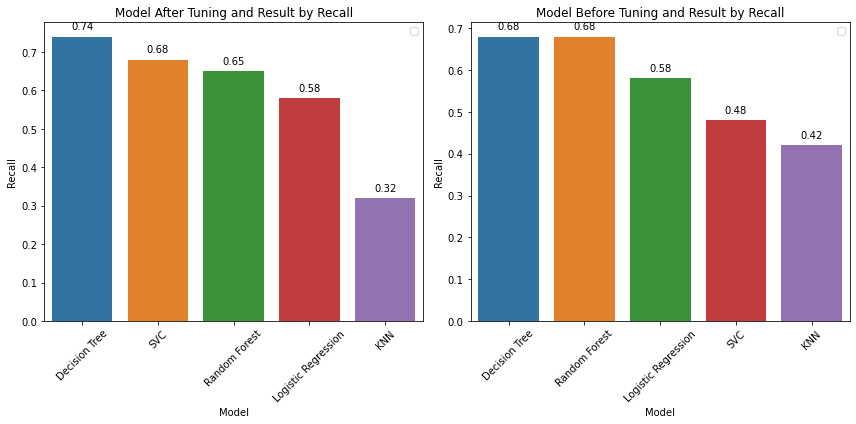

In [85]:
# Create figure for plotting
plt.figure(figsize=(12,6))

# Share Figure
plt.subplot(1,2,1)
p1 = sns.barplot(data=model_tun.sort_values(by='Recall', ascending=False), x='Model', y='Recall')
for p in p1.patches:
    p1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.legend()
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.title("Model After Tuning and Result by Recall")

# Share figure
plt.subplot(1,2,2)
q = sns.barplot(data=model_default.sort_values(by='Recall', ascending=False), x='Model', y='Recall')
for p in q.patches:
    q.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.legend()
plt.title("Model Before Tuning and Result by Recall")
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.tight_layout()
plt.show()

# Save Model


In [95]:
# import module for saving model
import pickle

# model saving
with open("model_dc.pkl", "wb") as model_file:
    pickle.dump(clf_dc_tun, model_file)
print("Waitting for saving...")
time.sleep(3)
print("Model Successfully Saving")

Waitting for saving...
Model Successfully Saving


In [117]:
sample

,age,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,time,DEATH_EVENT
173,50.0,20,0,0.8,139,146,0
287,45.0,55,0,1.0,132,250,0
51,53.0,20,1,1.4,139,43,1
146,52.0,30,0,0.7,136,112,0
214,65.0,35,1,0.8,134,194,0
